In [118]:
!pip install matplotlib deap

In [119]:
import random
from deap import base, creator, tools, algorithms
import matplotlib.pyplot as plt
import statistics
import numpy as np


In [120]:
# Declaring the required arguments
num_locations = 20  # Define how many locations (excluding the depot) the vehicles need to visit
locations = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(num_locations)]  # Generate random (x, y) coordinates for each location
depot = (50, 50)  # Define the central depot location as a fixed point
num_vehicles = 3  # Define how many vehicles are available to visit the locations

In [121]:
# Genetic Algorithm Setup
creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))  # Define fitness function to minimize. The two objectives are total distance and balance penalty.
creator.create("Individual", list, fitness=creator.FitnessMin)  # Define individual structure. Individuals are lists with a fitness attribute.

toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)  # Function to generate a list of unique, randomly ordered location indices
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)  # Function to create an individual as a shuffled list of location indices
toolbox.register("population", tools.initRepeat, list, toolbox.individual)  # Function to create a population of individuals


In [122]:
#Fitness Function
def evalVRP(individual):
    total_distance = 0
    distances = []  # Track distance traveled by each vehicle for balance calculation
    # Split the list of locations among vehicles, ensuring each starts and ends at the depot
    for i in range(num_vehicles):

        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]

        # Calculate total distance traveled by this vehicle
        vehicle_distance = sum(np.linalg.norm(np.array(vehicle_route[k+1]) - np.array(vehicle_route[k])) for k in range(len(vehicle_route)-1))

        total_distance += vehicle_distance
        distances.append(vehicle_distance)

    balance_penalty = np.std(distances)  # Use standard deviation of distances as a penalty for imbalance among vehicles
    return total_distance, balance_penalty

toolbox.register("evaluate", evalVRP)

In [123]:
toolbox.register("mate", tools.cxPartialyMatched)  # Register the crossover function suitable for permutation-based representation
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)  # Register the mutation function to shuffle indices with a 5% chance per index
toolbox.register("select", tools.selTournament, tournsize=3)  # Register the selection function using tournament selection

In [124]:
# Plotting Function
def plot_routes(individual, title="Routes"):
    plt.figure()
    # Plot locations as blue dots and the depot as a red square
    for (x, y) in locations:
        plt.plot(x, y, 'bo')
    plt.plot(depot[0], depot[1], 'rs')

    # Draw routes for each vehicle
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route), '-', 'rs')

    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()


gen	nevals	avg    	min     
0  	300   	489.519	0.854307
1  	213   	470.596	2.0851  
2  	243   	464.452	2.18554 
3  	232   	456.243	4.26309 
4  	233   	455.146	5.43572 
5  	218   	446.842	0.435281
6  	213   	442.67 	0.435281
7  	233   	439.537	3.96501 
8  	219   	430.755	0.795862
9  	209   	418.187	1.15936 
10 	224   	410.995	2.20196 
11 	230   	399.089	0.0156849
12 	230   	383.647	0.0156849
13 	217   	366.791	1.51684  
14 	231   	355.104	1.14421  
15 	250   	346.489	1.14421  
16 	238   	335.442	0.13525  
17 	236   	332.39 	1.49167  
18 	225   	328.642	1.72044  
19 	225   	321.711	3.00112  
20 	209   	316.186	1.55359  
21 	232   	308.05 	1.14421  
22 	237   	300.238	2.6187   
23 	217   	294.454	5.34594  
24 	227   	286.7  	3.00052  
25 	246   	284.899	5.16878  
26 	233   	278.947	8.09394  
27 	219   	276.649	2.17647  
28 	229   	275.172	5.77446  
29 	223   	271.134	5.69142  
30 	238   	270.577	5.48861  


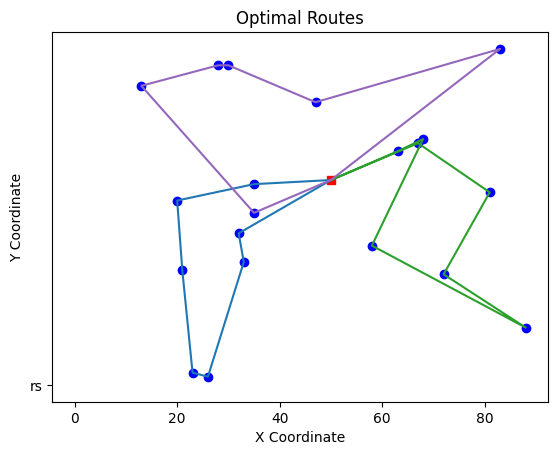

In [125]:
# Running the Genetic Algorithm
def main():
    random.seed(42)
    pop = toolbox.population(n=300)
    hof = tools.HallOfFame(1)

    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 30, stats=stats, halloffame=hof)
    #Refer eaSimple here - https://deap.readthedocs.io/en/master/api/algo.html

    plot_routes(hof[0], title="Optimal Routes")
    return pop, stats, hof

if __name__ == "__main__":
    pop, stats, hof = main()